#DeepLearningAssignment2

## 0.1.Installation


In [108]:
!pip install d2l

In [109]:
import torch
from torch import nn
from d2l import torch as d2l

##7.1.From Fully Connected Layers to Convolutions


##7.2.Convolutions for Images

In [110]:
def corr2d(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [111]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

In [112]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

In [113]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [114]:
K = torch.tensor([[1.0, -1.0]])

In [115]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [116]:
corr2d(X.t(), K)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

Kernal K only detects vertical Edges!

In [117]:
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)

X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {l.sum():.3f}')

epoch 2, loss 1.714
epoch 4, loss 0.294
epoch 6, loss 0.052
epoch 8, loss 0.010
epoch 10, loss 0.002


In [118]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 0.9904, -0.9961]])

learned kernel tensor is close to the kernel tensor K.

##7.3.Padding and Stride

In [119]:
def comp_conv2d(conv2d, X):
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    return Y.reshape(Y.shape[2:])

conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
print(X)
print(comp_conv2d(conv2d, X))
comp_conv2d(conv2d, X).shape

tensor([[0.1984, 0.9992, 0.1228, 0.3939, 0.3344, 0.0318, 0.4032, 0.6669],
        [0.7731, 0.9311, 0.8539, 0.8132, 0.0864, 0.6334, 0.1031, 0.2290],
        [0.9472, 0.1253, 0.0837, 0.8574, 0.7952, 0.9861, 0.2615, 0.8785],
        [0.3074, 0.6434, 0.1558, 0.8075, 0.0695, 0.8649, 0.2298, 0.7232],
        [0.4754, 0.8081, 0.7717, 0.4876, 0.5995, 0.8315, 0.8118, 0.1277],
        [0.3213, 0.2945, 0.9800, 0.2948, 0.5631, 0.3483, 0.0778, 0.0732],
        [0.7381, 0.3695, 0.6687, 0.3519, 0.8901, 0.1738, 0.2934, 0.4053],
        [0.5241, 0.6170, 0.7517, 0.0782, 0.8749, 0.8771, 0.5941, 0.4258]])
tensor([[ 0.0285,  0.3734,  0.3200,  0.2331,  0.3226,  0.0457,  0.0369,  0.0403],
        [-0.0775, -0.2024,  0.2204,  0.1777,  0.3506,  0.4708,  0.3703,  0.2330],
        [ 0.0735,  0.3133,  0.3567,  0.0382,  0.2949, -0.0772,  0.2700,  0.1079],
        [-0.0861,  0.5962,  0.2353,  0.2680,  0.3163,  0.4221,  0.4313,  0.1212],
        [-0.1023,  0.0214,  0.2884,  0.0540,  0.2676, -0.2302,  0.3151, -0.0202

torch.Size([8, 8])

In [120]:
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [121]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [122]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

##7.4.MultipleInput and Multiple Output Channels

In [123]:
def corr2d_multi_in(X, K):
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

In [124]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

In [125]:
def corr2d_multi_in_out(X, K):
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [126]:
K = torch.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [127]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

In [128]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

In [129]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
print(Y1)
print(Y2)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

tensor([[[-1.9662, -0.4338, -3.4396],
         [-2.2989, -0.4998, -0.4554],
         [ 1.0167, -1.6806,  0.1215]],

        [[ 2.6687,  0.8972, -1.9620],
         [-2.7739, -0.9719, -1.1503],
         [-2.8555,  2.6781, -5.5760]]])
tensor([[[-1.9662, -0.4338, -3.4396],
         [-2.2989, -0.4998, -0.4554],
         [ 1.0167, -1.6806,  0.1215]],

        [[ 2.6687,  0.8972, -1.9620],
         [-2.7739, -0.9719, -1.1503],
         [-2.8555,  2.6781, -5.5760]]])


##7.5.Pooling


In [130]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [131]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [132]:
pool2d(X, (2,2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [133]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [134]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [135]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [136]:
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1))
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [137]:
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [138]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

##7.6.Convolutional Neural Networks(LeNet)

In [139]:
def init_cnn(module):
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [140]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


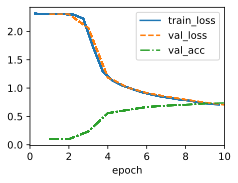

In [141]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

##8.2.Networks Using Blocks (VGG)

In [142]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [143]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [144]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


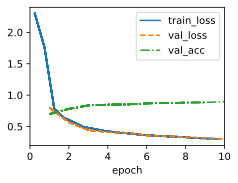

In [145]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

##8.6.Residual Networks (ResNEt) and ResNeXt

In [146]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [147]:
class Residual(nn.Module):
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [148]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [149]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

In [150]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [151]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [152]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [153]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


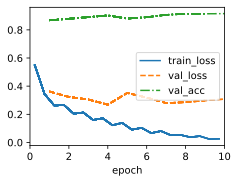

In [154]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [155]:
class ResNeXtBlock(nn.Module):
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [156]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

##Discussions & Exercises

### 7.1.2. Discussions

\begin{align*}
\mathbf{H}_{i,j} &= \mathbf{U}_{i,j} + \sum_k \sum_l \mathbf{W}_{i,j,k,l} \mathbf{X}_{k,l} \\
&= \mathbf{U}_{i,j} + \sum_a \sum_b \mathbf{V}_{i,j,a,b} \mathbf{X}_{i+a,j+b}
\end{align*}

* $\mathbf{H}$ : hidden representations

* $\mathbf{X}$ : inputs


###7.1.6.Exercises

What happens with convolution when an object is at the boundary of an image?

-> 경계 근처에 있다면 이웃 픽셀이 적기 때문에 합성곱 연산 결과에 영향을 미칠 수 있음.
해결하기 위한 방법:
- Zero Padding : 이미지 경계 주변에 0을 추가하여 필요로 하는 픽셀의 수를 만족하도록 함.
- Replicate Padding : 경계 픽셀 값을 그대로 복제하여 경계 바깥으로 확장하는 방법. 가장자리 픽셀 값을 "늘려" 필터가 경계 부분에서도 추가 정보를 사용할 수 있게 함.

###7.2.8. Exercises

In [157]:
X = torch.zeros(10, 10)
for i in range(10):
    X[i, i] = 1

In [158]:
K = torch.tensor([[1.0, -1.0]])
Y = corr2d(X, K)
Y

tensor([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.]])

In [159]:
Z = corr2d(X.t(), K)
Z

tensor([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.]])

In [160]:
P = corr2d(X, K.t())
P

tensor([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.]])

###7.3.Discussions


출력 크기 공식:

$
H_{\text{out}} = \frac{H_{\text{in}} - K_h + 2P_h}{S_h} + 1
$
$
W_{\text{out}} = \frac{W_{\text{in}} - K_w + 2P_w}{S_w} + 1
$

여기서,
- $( H_{\text{in}}, W_{\text{in}} )$: 입력 이미지의 높이와 너비

- $( K_h, K_w )$: 커널의 높이와 너비

- $( P_h, P_w )$: 패딩의 높이와 너비

- $( S_h, S_w )$: 스트라이드의 높이와 너비

- $( H_{\text{out}}, W_{\text{out}} )$: 출력 특성 맵의 높이와 너비


###7.4.Discussions

When the input data contains multiple channels, we need to construct a convolution kernel with the same number of input channels as the input data.

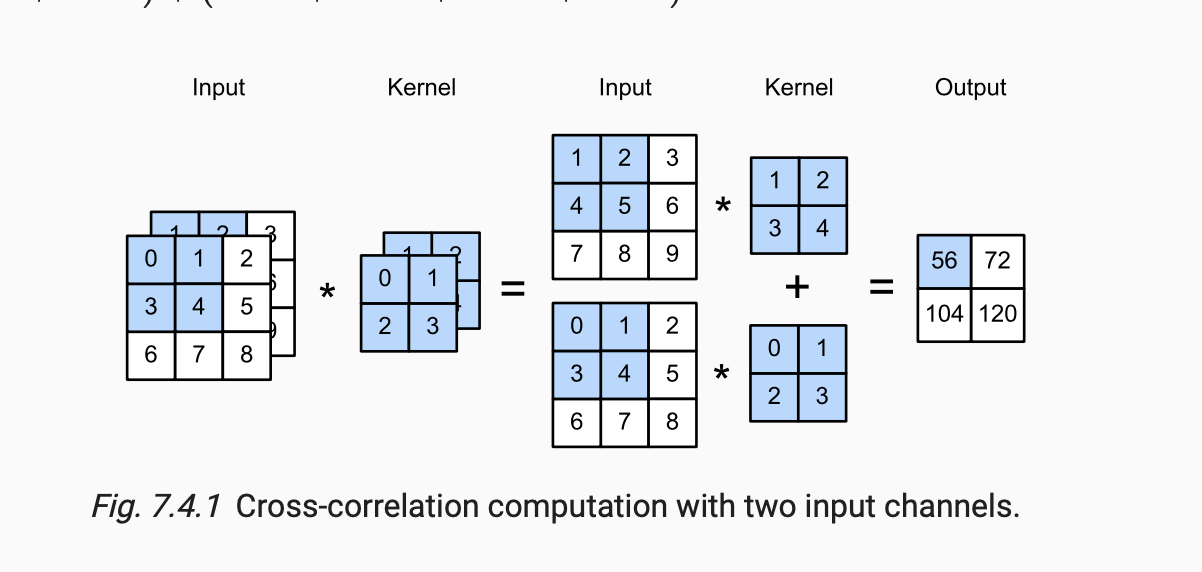

###7.5.Discussions

- Maximum Pooling : 각 픽셀의 가장 큰 수만 추출하는 방법
- Average Pooling : 각 픽셀 값의 평균을 대표하는 수로 하는 방법.

###7.5.Exercises

In [161]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X_new_concat = torch.cat((X, X + 5, X - 3), dim=1)
print(X_new_concat)
print('-------------')
pool2d = nn.MaxPool2d(3, padding=1, stride=4)
output_new = pool2d(X_new_concat)
print(output_new)


tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.],
          [17., 18., 19., 20.]],

         [[-3., -2., -1.,  0.],
          [ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.]]]])
-------------
tensor([[[[ 5.]],

         [[10.]],

         [[ 2.]]]])


###7.6.Exercises
- Display the activations of the first and second layer of LeNet for different inputs
- Train with CIFAR-10

In [162]:
class Reshape(torch.nn.Module) :
  def forward(self, x):
    return x.view(-1, 1, 28, 28)
net = torch.nn.Sequential(Reshape(), nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
                          nn.AvgPool2d(kernel_size=2, stride=2),
                          nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
                          nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
                          nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
                          nn.Linear(120, 84), nn.Sigmoid(), nn.Linear(84,10)).to(d2l.try_gpu())

In [163]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


In [164]:
import matplotlib.pyplot as plt

def show_images(images, nrows, ncols, titles=None):
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
    for i in range(nrows * ncols):
        ax = axes[i] if nrows == 1 else axes[i // ncols, i % ncols]
        ax.imshow(images[i], cmap='viridis')
        ax.axis('off')
        if titles:
            ax.set_title(titles[i])
    plt.show()

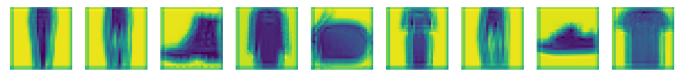

In [165]:
data_iter = iter(train_loader)
images, labels = next(data_iter)
device = d2l.try_gpu()

x_first_Sigmoid_layer = net[0:3](images.to(device)).cpu().detach().numpy()[0:9, 1, :, :]
x_first_Sigmoid_layer.shape


show_images(x_first_Sigmoid_layer.reshape(9, 28, 28), 1, 9)


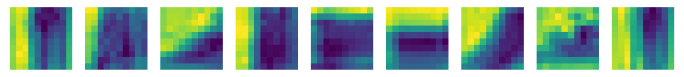

In [166]:
data_iter = iter(train_loader)
images, labels = next(data_iter)
device = d2l.try_gpu()

x_second_Sigmoid_layer = net[0:6](images.to(device)).cpu().detach().numpy()[0:9, 1, :, :]
x_second_Sigmoid_layer.shape


show_images(x_second_Sigmoid_layer.reshape(9, 10, 10), 1, 9)


In [167]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch import nn, optim

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)



model = LeNet(num_classes=10)
optimizer = optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()


for epoch in range(10):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')


Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 2.294325828552246
Epoch 2, Loss: 2.3035967350006104
Epoch 3, Loss: 2.2967653274536133
Epoch 4, Loss: 2.3061301708221436
Epoch 5, Loss: 2.29586124420166
Epoch 6, Loss: 2.3058841228485107
Epoch 7, Loss: 2.3222591876983643
Epoch 8, Loss: 2.3006088733673096
Epoch 9, Loss: 2.3026089668273926
Epoch 10, Loss: 2.305776357650757
Accuracy: 10.0%


###8.2.2.Discussions
-VGG Network
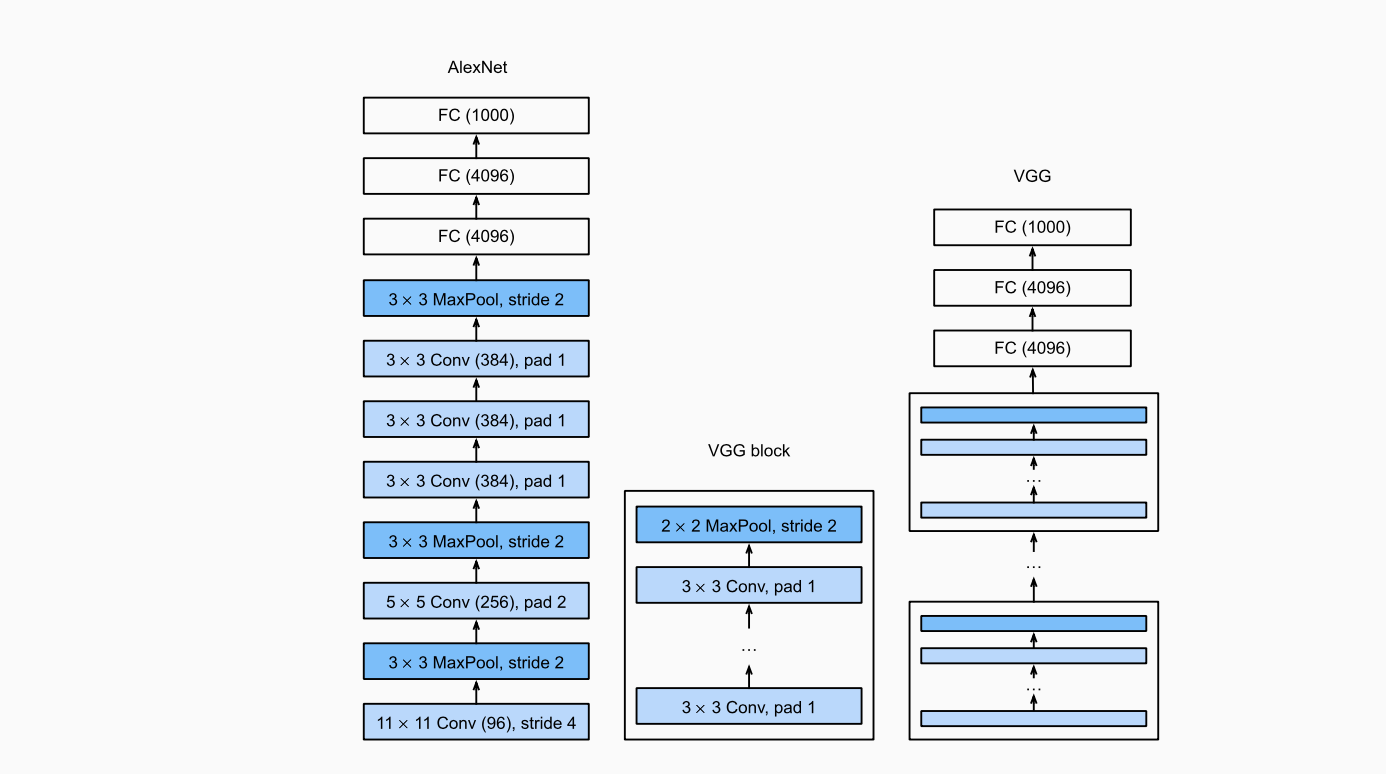

###8.2.Exercises
Comapre the number of parameters needed for AlexNet and VGG.

In [168]:
import torch
import torchvision.models as models

alexnet = models.alexnet()
vgg16 = models.vgg16()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

alexnet_params = count_parameters(alexnet)
vgg16_params = count_parameters(vgg16)

print(f"AlexNet Total Parameters: {alexnet_params}")
print(f"VGG16 Total Parameters: {vgg16_params}")


AlexNet Total Parameters: 61100840
VGG16 Total Parameters: 138357544


###8.6.Summary & Discussions

- ResNet은 Residual 연결을 통하여 입력을 출력으로 직접 전달할 수 있도록 함. 이 방식은 네트워크의 귀납적 편향을 변경하여 단순 함수가 특정 형태가 아닌 더 복잡한 형태로 나타날 수 있도록 함.
- Residual 을 통해 입력이 더 빠르게 전달되어, 효과적으로 깊게 학습할 수 있도록 함. (깊어도 안정적임)
- 'Gradient Vanishing' 문제를 방지할 수 있음. <- 이전 층의 출력이 다음 층으로 직접 전달되므로, 기울기가 소실되지 않고 잘 전달됨.

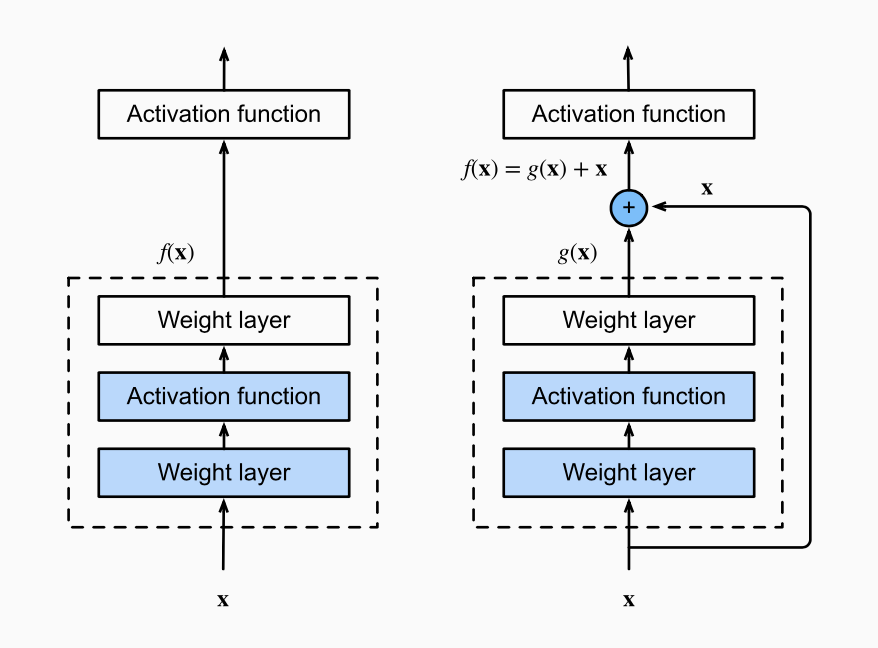
